In [1]:
import os
os.chdir('/notebooks/src/CIFAR-10/')

In [2]:
import keras
import scipy
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential
from keras.activations import relu, softmax
from keras.layers.advanced_activations import LeakyReLU
from keras import layers
from lib.load_images import load_data
import numpy as np

Using TensorFlow backend.


Load image data and modify the size

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

In [4]:
mod_X_train = np.array([scipy.misc.imresize(X_train[i], (128, 128, 3)) 
                            for i in range(0, len(X_train))]).astype('float32')

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
mod_X_train.shape

(50000, 128, 128, 3)

In [7]:
batch_size = 32
num_classes = 10
epochs = 50
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'img128.h5'

In [9]:
cnn = Sequential([
    Conv2D(2, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(.25),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(.25),
    Dense(10, activation='softmax')
])

In [10]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 2)       56        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 16)      304       
_________________________________________________________________
dropout_3 (Dropout)          (None, 124, 124, 16)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7872640   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [11]:
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
history = cnn.fit(mod_X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=.3,
    shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 1226s - loss: 14.4949 - acc: 0.1006 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 3/10
35000/35000 [==============================] - 930s - loss: 14.4944 - acc: 0.1007 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 4/10
35000/35000 [==============================] - 841s - loss: 14.4939 - acc: 0.1008 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 5/10
35000/35000 [==============================] - 526s - loss: 14.4979 - acc: 0.1005 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 6/10
35000/35000 [==============================] - 526s - loss: 14.4943 - acc: 0.1007 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 7/10
35000/35000 [==============================] - 677s - loss: 14.4962 - acc: 0.1006 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 8/10
35000/35000 [==============================] - 951s - loss: 14.4934 - acc: 0.1008 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 10/10
35000/35000 [=======

In [ ]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


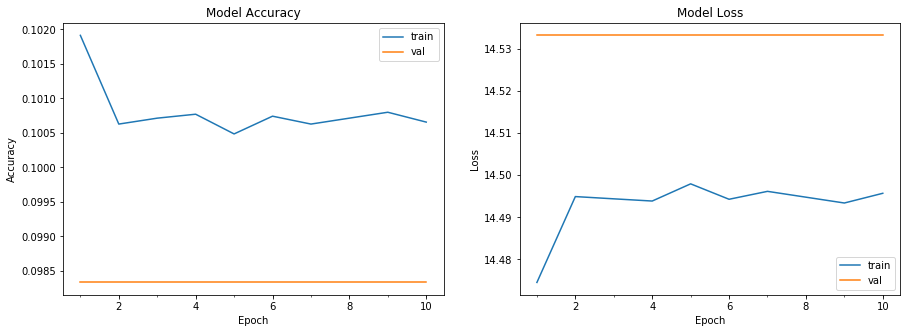

In [ ]:
plot_model_history(history)

In [16]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
cnn.save(model_path)